<a href="https://colab.research.google.com/github/destrospooder/basil-data/blob/main/datavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'timestamp': datetime.datetime(2020, 12, 1, 0, 11, 57, 322000), 'value': 54.1}
{'timestamp': datetime.datetime(2020, 12, 1, 0, 27, 16, 321000), 'value': 51.8}
{'timestamp': datetime.datetime(2020, 12, 1, 0, 42, 29, 522000), 'value': 53.5}
{'timestamp': datetime.datetime(2020, 12, 1, 0, 57, 39, 622000), 'value': 54.1}
{'timestamp': datetime.datetime(2020, 12, 1, 1, 13, 3, 822000), 'value': 50}
{'timestamp': datetime.datetime(2020, 12, 1, 1, 31, 0, 321000), 'value': 53}
{'timestamp': datetime.datetime(2020, 12, 1, 1, 46, 39, 523000), 'value': 53.6}
{'timestamp': datetime.datetime(2020, 12, 1, 2, 1, 53, 922000), 'value': 53.9}
{'timestamp': datetime.datetime(2020, 12, 1, 2, 17, 5, 423000), 'value': 53.7}
{'timestamp': datetime.datetime(2020, 12, 1, 2, 32, 32, 222000), 'value': 51.9}
{'timestamp': datetime.datetime(2020, 12, 1, 2, 47, 50, 333000), 'value': 53.3}
{'timestamp': datetime.datetime(2020, 12, 1, 3, 3, 9, 822000), 'value': 53.9}
{'timestamp': datetime.datetime(2020, 12, 1, 3, 18

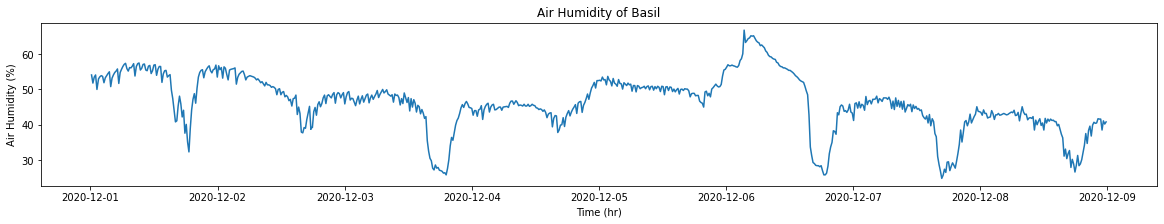

In [15]:
import requests
import json
import pandas as pd
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

response=requests.get("https://cusap-iot.uc.r.appspot.com/system/listSystems")
response_dict=response.json()

system_dictionary = {}
for system in response_dict["_msg"]["payload"]:
  system_dictionary[system["name"]] = system["_id"]

hydrokit = system_dictionary["Node MCU 1.0"]

humidity = {"systemId": hydrokit, "timePeriod": "hour", "reading": "Air-Humidity"}
data = requests.get("https://cusap-iot.uc.r.appspot.com/system/getReadings", params = humidity)

humidity_d = data.json()
indiv_data = humidity_d["_msg"]["payload"]

for i in range(0, len(indiv_data)):
  del indiv_data[i]["_id"]
  del indiv_data[i]["system"]
  del indiv_data[i]["issue"]
  indiv_data[i]["timestamp"] = datetime.strptime(indiv_data[i]["timestamp"], "%Y-%m-%dT%H:%M:%S.%fZ")
  print(indiv_data[i])

hour_change = pd.DataFrame.from_records(indiv_data).groupby(["timestamp"]).mean()
plot_data = hour_change.to_numpy()

plt.figure(figsize=(20,3))
plt.title("Air Humidity of Basil")
plt.xlabel("Time (hr)")
plt.ylabel("Air Humidity (%)")
plt.plot(hour_change.index, plot_data)
plt.show()